<img src=Images/Banner2.png width=600 >

# $HW3 - Classification$
## **Ali Kheiri - 810603071**
---

## **Table of contents**<a id='toc0_'></a>    
- [EDA](#toc1_)    
  - [Getting to Know the Data](#toc1_1_)    
  - [Missing Values Analysis and Handling](#toc1_2_)    
  - [Correlation Analysis and Visualization](#toc1_3_)
      
   
- [Preprocessing Data](#toc2_)        
  - [Handling Outliers](#toc2_1_) 
  - [Normalization and Standardizing](#toc2_2_) 
  
- [Dual Choice Classification](#toc3_)   
  - [Creating Target Column](#toc3_1_) 
  - [Unbalanced Data Analysis and Handling](#toc3_2_)
  - [Training Classification Models and Evaluation](#toc3_3_)
  - [Tuning Hyperparameters](#toc3_4_)
  - [Model Comparison](#toc3_5_)

- [Multiple Choice Classification](#toc4_)   
  - [Training Classification Models and Evaluation](#toc4_1_)
  - [Tuning Hyperparameters](#toc4_2_)
  - [Model Comparison](#toc4_3_)

## <a id='toc1_'></a>[Exploratory Data Analysis](#toc0_)  

> The Main Goal of EDA is to get to underestand the data. This Process is about reading the data, trying to underestand the features that affect the data, size of the dataset and many more information that can later guide us to perform a better data engineering and feature selection. 
This process is nessecory in order to later achieve better results in the regression analysis part.
----
Main Goals of this part are:
1. Read and underestand the data using `.info()` and `.describe()`
2. Detect and analyse Missing Values
3. Correlation Analysis and Visualization

### <a id='toc1_1_'></a>[Getting to Know the Data](#toc0_)  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("milling_machine.csv")
df.head(10)

,Air Temp (°C),Process Temp (°C),Rotational Speed (RPM),Torque (Nm),Tool Wear (Seconds),Failure Types
0,29.021640,71.620737,1515.840689,50.223021,664.638000,No Failure
1,21.886075,69.896471,2083.417786,52.221351,6628.080758,No Failure
2,29.020744,74.731134,2455.801496,57.822145,3295.576818,No Failure
3,25.793868,70.715109,2112.654324,69.910072,7116.479752,No Failure
4,21.056760,71.025092,1642.485295,68.411333,1191.996403,No Failure
5,24.471829,70.431543,1752.720453,62.722722,8146.705688,No Failure
6,25.863432,76.917850,1086.057335,56.204645,9095.913697,No Failure
7,23.684961,60.180097,2329.956108,68.463462,9278.241597,No Failure
8,25.814751,66.724647,2343.004715,53.902666,1511.295866,No Failure
9,23.330397,74.752506,1855.727733,66.797293,1644.718015,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air Temp (°C)           9965 non-null   float64
 1   Process Temp (°C)       9990 non-null   float64
 2   Rotational Speed (RPM)  10000 non-null  float64
 3   Torque (Nm)             10000 non-null  float64
 4   Tool Wear (Seconds)     9993 non-null   float64
 5   Failure Types           9991 non-null   object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Air Temp (°C),Process Temp (°C),Rotational Speed (RPM),Torque (Nm),Tool Wear (Seconds)
count,9965.000000,9990.000000,10000.000000,10000.000000,9993.000000
mean,28.516926,80.812186,1401.909988,46.998845,11393.143344
std,7.719340,15.548350,968.446183,26.747646,9023.336380
min,20.001366,60.001876,0.047731,0.015920,3.469877
25%,23.176455,68.090324,423.672240,18.091381,5023.027818
50%,26.212082,76.553203,1377.047835,54.983239,8995.172952
75%,29.377536,92.825894,2307.969925,67.258375,15024.825673
max,49.998008,119.971025,2999.953724,89.993221,35999.566519


In [6]:
df['Failure Types'].value_counts()

Failure Types
Power Failure               1999
Tool Wear Failure           1999
No Failure                  1998
Heat Dissipation Failure    1998
Overstrain                  1997
Name: count, dtype: int64

> `df.info` allows us to dive deeper into the dataset, here are some charastristics of the dataset that draw attention:

1. The dataset contains about 10k records and 6 columns, where the target is to determine `FailureType` Using classification.
2. The dataset includes numerical information such as Air temp, Process temp, RPM, Torque and Tool wear.
3. Features contain all numerical values and the target is a categorical value that determines the type of machine failure.

### <a id='toc1_2_'></a>[Missing Values Analysis and handling](#toc0_)  

> This Part includes 3 tasks: 
1. Detect and summerize Missing values for each feature

2. For **Categorical columns or (target)** missing values are droped becauese it is safer.

3. For **Numerical columns** missing values are replaced with median.
            

4. Validate that there is no missing values left.

In [7]:
## Detect Missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  
total_missing = missing_values.sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100

# Calculate percentage of missing values per column
missing_percentage_per_column = (missing_values / len(df)) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage_per_column
})

print("Columns with Missing Values:")
print(missing_summary)
print(f"\nTotal Missing Values: {total_missing}")
print(f"Percentage of Total Missing Values: {missing_percentage:.2f}%")

Columns with Missing Values:
                     Missing Values  Percentage (%)
Air Temp (°C)                    35            0.35
Process Temp (°C)                10            0.10
Tool Wear (Seconds)               7            0.07
Failure Types                     9            0.09

Total Missing Values: 61
Percentage of Total Missing Values: 0.10%


In [8]:
## Imputation


## First we should drop all columns where failure type is missing

df = df.dropna(subset=['Failure Types'])

## Imputation for numerical columns

numerical_cols = df.select_dtypes(include=['Float64'])

for col in numerical_cols.columns:
    df[col] = df[col].fillna(df[col].median())

In [9]:
## Create new dataframe and validate that there are no missing values left

cat_cols = df['Failure Types']

numerical_cols_cleaned = df.select_dtypes(include=['Float64'])


df_new = pd.concat([numerical_cols_cleaned , cat_cols] , axis=1)
df_new.head()

,Air Temp (°C),Process Temp (°C),Rotational Speed (RPM),Torque (Nm),Tool Wear (Seconds),Failure Types
0,29.021640,71.620737,1515.840689,50.223021,664.638000,No Failure
1,21.886075,69.896471,2083.417786,52.221351,6628.080758,No Failure
2,29.020744,74.731134,2455.801496,57.822145,3295.576818,No Failure
3,25.793868,70.715109,2112.654324,69.910072,7116.479752,No Failure
4,21.056760,71.025092,1642.485295,68.411333,1191.996403,No Failure


In [10]:
## Validate that there are no missing values left

print (f"Number of missing values in new dataframe : {df_new.isnull().sum().sum()}")

Number of missing values in new dataframe : 0


### <a id='toc1_3_'></a>[Correlation Analysis](#toc0_)  

> To find more important features, we need to calculate `Correlations` between each numerical features and the target which is Failure type. Since the target is a categorical values with no ordinal charastristics, we can not use the regular `Pearson Correlation` to detect the relationships between features and the target. Instead we will use `ANOVA F-test (Analysis of Variance)` which measures how much the mean of the feature differs across different target classes.

This part is done in 4 parts:
1. Compute ANOVA F-values and p-values, this process needs encoding the target into numercial values as well.
2. Visualize feature importance based on f_value.
3. Visualize top 3 correlated features using jointplot and also histogram (Distribution) of each feature.
 

In [11]:
# Devide dataset into numerical and categorical datasets

features = df_new.select_dtypes(include=['float64'])
target = df_new['Failure Types']

In [12]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

## Encoding the target

le = LabelEncoder()

encoded_target = le.fit_transform(target)

## Calculate f values and p values

f_vals, p_vals = f_classif(features, encoded_target)

## Create a dataframe

anova_df = pd.DataFrame({
    'Feature': features.columns, 
    'F-Value': f_vals,
    'p-Value': p_vals
}).sort_values(by='F-Value', ascending=False)

anova_df

,Feature,F-Value,p-Value
3,Torque (Nm),24114.558715,0.0
2,Rotational Speed (RPM),21233.746448,0.0
0,Air Temp (°C),11721.230565,0.0
1,Process Temp (°C),11676.234816,0.0
4,Tool Wear (Seconds),10851.597293,0.0


Text(0.5, 1.0, 'Feature Importance')

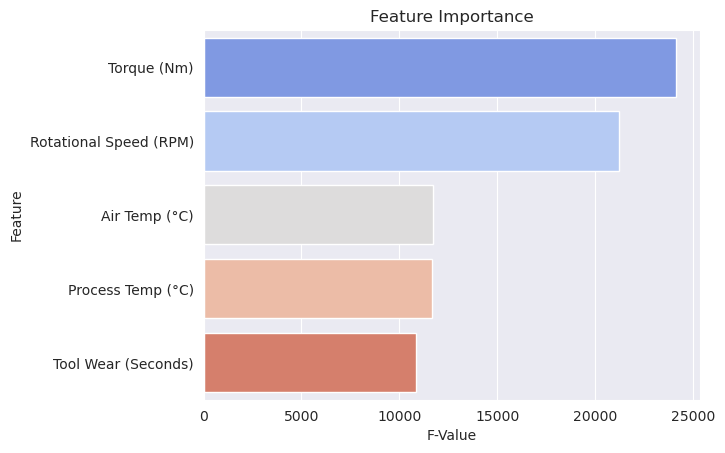

In [13]:
## Visualize importance Visualization
sns.barplot(y = anova_df['Feature'] , x = anova_df['F-Value'] ,  palette='coolwarm')
plt.title("Feature Importance")

Text(0.5, 1.0, 'Torque Distribution by Failure Type')

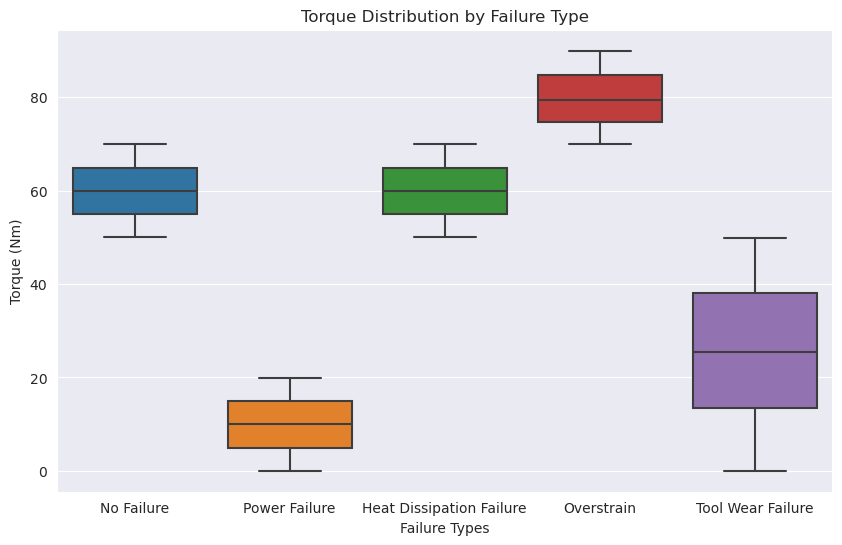

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = df_new['Torque (Nm)'] , x= df_new['Failure Types'])
plt.title('Torque Distribution by Failure Type')


/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Torque Distribution')

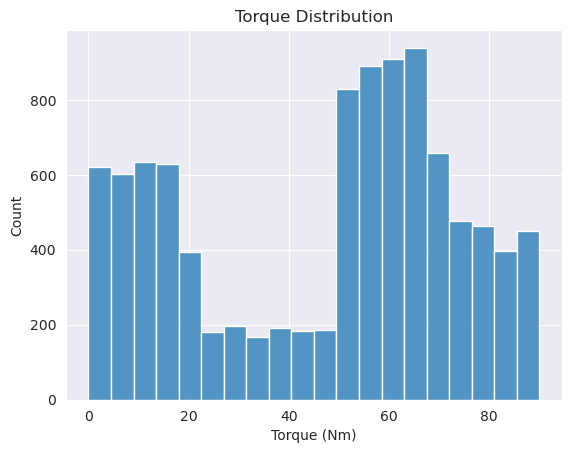

In [15]:
sns.histplot(df_new['Torque (Nm)'] )
plt.title("Torque Distribution")

Text(0.5, 1.0, 'Rotational Speed Distribution by Failure Type')

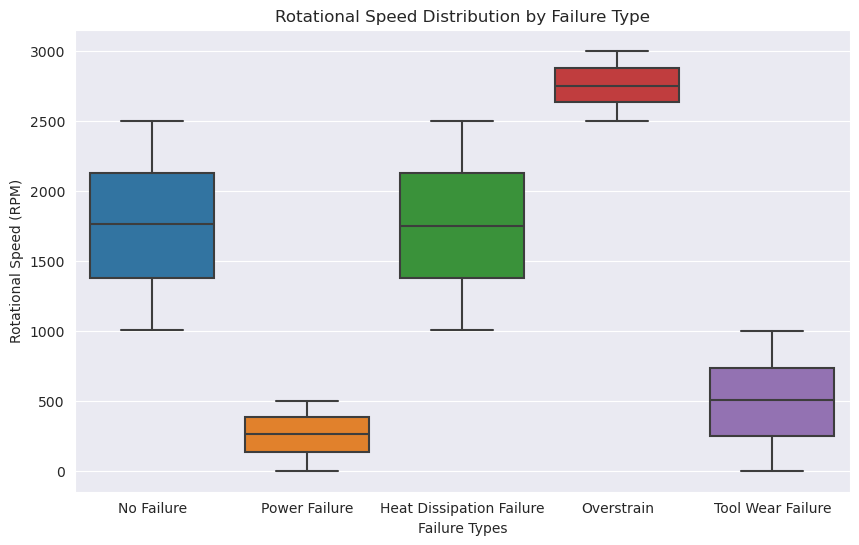

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = df_new['Rotational Speed (RPM)'] , x= df_new['Failure Types'])
plt.title('Rotational Speed Distribution by Failure Type')


/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'RPM Distribution')

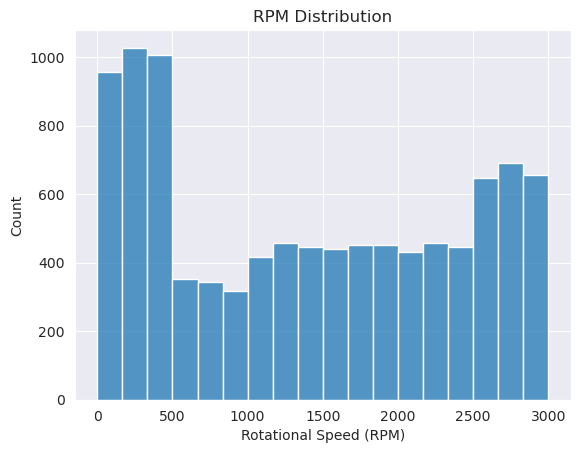

In [17]:
sns.histplot(df_new['Rotational Speed (RPM)'] )
plt.title("RPM Distribution")

Text(0.5, 1.0, 'Process temp Distribution by Failure Type')

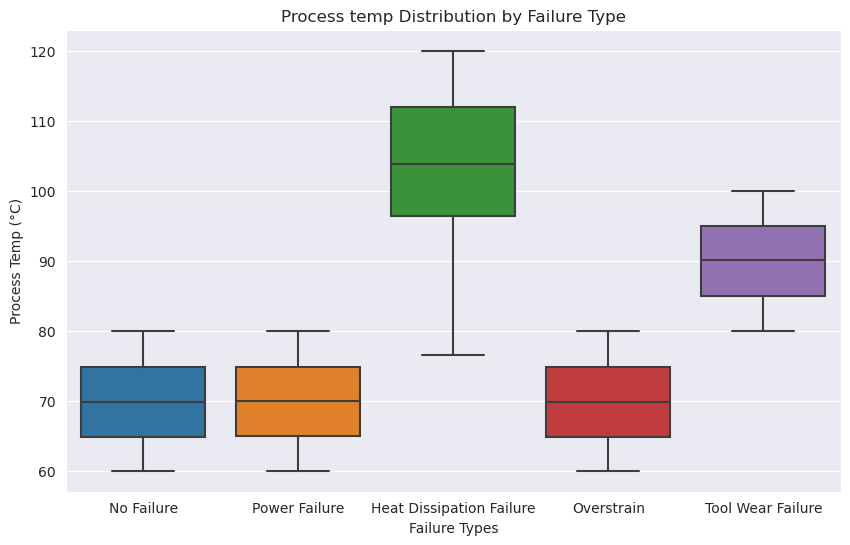

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = df_new['Process Temp (°C)'], x= df_new['Failure Types'])
plt.title('Process temp Distribution by Failure Type')


/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Process Temp Distribution')

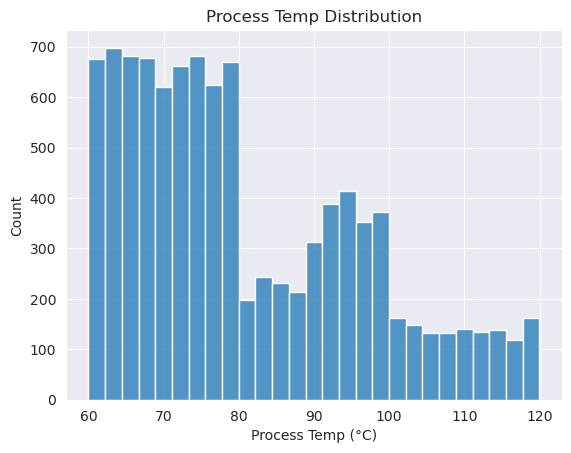

In [19]:
sns.histplot(df_new['Process Temp (°C)'] )
plt.title("Process Temp Distribution")

___

## <a id='toc2_'></a>[Preprocessing Data](#toc0_)  

> This part includes cleaning the data, such as:

1. Handling Missing data `Already done`
2. Detect and Delete Outliers using IQR method for top 2 features that are correlated with the target (RPM and Torque)
3. Normalize and Standardize data (if needed)



### <a id='toc2_1_'></a>[Handling Outliers](#toc0_)  

> Handling Outliers is done in 3 parts:
1. Visualizing distribution of the freatures or using boxplot 
2. Calculate the number of outliers using IQR method for each feature
3. Visualize distribution of the target after removing outlier

### 1.Outliers for `Rotational Speed`

Text(0.5, 1.0, 'Box Plot for Rotational Speed, showing the outliers')

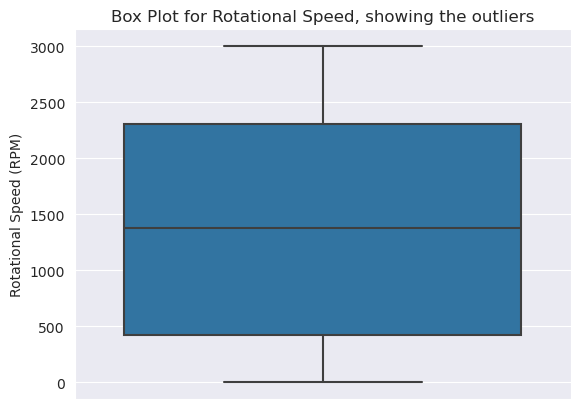

In [20]:
sns.boxplot(y = df_new['Rotational Speed (RPM)'])
plt.title("Box Plot for Rotational Speed, showing the outliers")

In [21]:
# Detect Outliers using IQR method for air temp

target = df_new['Rotational Speed (RPM)']

Q1 = target.quantile(q = 0.25)
Q3 = target.quantile(q = 0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_new[(target < lower_bound) | (target > upper_bound)]

num_outliers = outliers.shape[0]

# Print results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers for rotational Speed: {num_outliers}")



Q1: 423.31567388288374
Q3: 2307.6573904092356
IQR: 1884.3417165263518
Lower Bound: -2403.196900906644
Upper Bound: 5134.169965198764
Number of Outliers for rotational Speed: 0


❗️ **As it is observed, the are no outliers for this feature**

### 1.Outliers for `Torque`

Text(0.5, 1.0, 'Box Plot for Torque, showing the outliers')

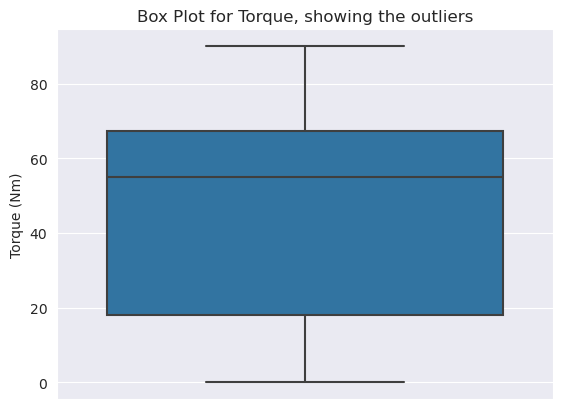

In [22]:
sns.boxplot(y = df_new['Torque (Nm)'])
plt.title("Box Plot for Torque, showing the outliers")

In [23]:
# Detect Outliers using IQR method for torque

target = df_new['Torque (Nm)']

Q1 = target.quantile(q = 0.25)
Q3 = target.quantile(q = 0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_new[(target < lower_bound) | (target > upper_bound)]

num_outliers = outliers.shape[0]

# Print results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers for rotational Speed: {num_outliers}")


Q1: 18.090987798433975
Q3: 67.25371840091196
IQR: 49.16273060247799
Lower Bound: -55.65310810528301
Upper Bound: 140.99781430462895
Number of Outliers for rotational Speed: 0


❗️ **As it is observed, the are no outliers for this feature**

### <a id='toc2_2_'></a>[Normalize and Standardize](#toc0_)  

> This section is done in three parts:
1. A quick explanation of what standardizing and normalizing mean.
2. Chech if it is needed to apply these based on our dataframe values.
3. Apply.

---
🔑 Normalization, also known as Min-Max scaling, is a feature scaling technique that transforms the features to a fixed range, typically between 0 and 1. This method preserves the shape of the original distribution and maintains zero values in sparse data.

Normalization scales each feature individually by subtracting the minimum value and dividing by the range (maximum - minimum). The formula for normalization is:

$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}$

Where:
- $X$ is the original feature vector
- $X_{min}$ is the minimum value of $X$
- $X_{max}$ is the maximum value of $X$

🔑 Standardization, also known as Z-score normalization, is another crucial feature scaling technique that transforms the data to have a mean of 0 and a standard deviation of 1. This method is particularly useful when dealing with features that follow a Gaussian distribution.

Standardization scales each feature by subtracting the mean and dividing by the standard deviation. The formula for standardization is:

$X_{standardized} = \frac{X - \mu}{\sigma}$

Where:
- $X$ is the original feature vector
- $\mu$ is the mean of the feature
- $\sigma$ is the standard deviation of the feature


### 🤔 Do we need this techniques or not?

The answer is yes, here are some reasons:
1. Our features have different scales, for example `Air Temp` is between 20 to 40 where as `RPM` is in 1000 range. This will create problem in many machine learning algorithms.
2. Distance-based algorithms such as KNN are senstive and these techniques will help them.
3. Tree-based algorithms such as Random-forest are insensitive to feature scaling.

So here we will apply **Standardization** to our feature.

It is worth mentioning in order to prevent data leakage, we need to first split the data into train and test and also create and encode the new column before feature scaling. So some of tasks that are originally assigned to next section, will be applied here.

In [ ]:
## Creating new column

df_new['Broken'] = df_new['Failure Types'].apply(lambda x:  0  if x == "No Failure" else 1)

df_new.head()

,Air Temp (°C),Process Temp (°C),Rotational Speed (RPM),Torque (Nm),Tool Wear (Seconds),Failure Types,Broken
0,29.021640,71.620737,1515.840689,50.223021,664.638000,No Failure,0
1,21.886075,69.896471,2083.417786,52.221351,6628.080758,No Failure,0
2,29.020744,74.731134,2455.801496,57.822145,3295.576818,No Failure,0
3,25.793868,70.715109,2112.654324,69.910072,7116.479752,No Failure,0
4,21.056760,71.025092,1642.485295,68.411333,1191.996403,No Failure,0


In [25]:
## Encode Failure type

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

failure_types = df_new['Failure Types']

le = LabelEncoder()
df_new['Failure Encoded'] = le.fit_transform(df_new['Failure Types'])

feature_cols = ['Air Temp (°C)', 'Process Temp (°C)', 'Rotational Speed (RPM)', 'Torque (Nm)', 'Tool Wear (Seconds)']

y_binary = df_new['Broken']

y_multi = df_new['Failure Encoded']


In [ ]:
## Split data into train and test for both dual classification and multipe classification


X_train, X_test, y_train_bin, y_test_bin = train_test_split(df_new[feature_cols], y_binary, test_size=0.2, random_state=42, stratify=y_binary)

_, _, y_train_multi, y_test_multi = train_test_split(df_new[feature_cols], y_multi, test_size=0.2, random_state=42, stratify=y_multi)


In [27]:
## Standardize x_train and x_test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled

array([[ 1.39634517,  0.73469686,  0.2994436 ,  0.38641119,  0.02130031],
       [-0.02880073, -0.06108035,  0.08978278,  0.76574629, -0.67995244],
       [-0.94805429, -0.85401032, -0.17651046,  0.7163321 , -0.58799456],
       ...,
       [-0.08074734, -0.30470612,  0.20936118,  0.84117711, -0.61977677],
       [ 2.63295509,  0.87527835,  0.82752219,  0.41416856, -0.86650164],
       [ 1.02723938,  2.0759435 ,  0.54032942,  0.28005662, -0.43976512]])

___

## <a id='toc3_'></a>[Dual Choice Classification](#toc0_)  

### <a id='toc3_1_'></a>[Creating Target Column](#toc0_)  

This process has already been done in the previous section, now there are 2 y:
1. `y_binary`: Which explains whether the machine is broken or not, used for dual choice classification.
2. `y_multi`: Which includes different types of failure, needed for multipe choice classification.

In [29]:
y_binary.value_counts()

Broken
1    7993
0    1998
Name: count, dtype: int64

In [30]:
y_multi.value_counts()

Failure Encoded
3    1999
4    1999
1    1998
0    1998
2    1997
Name: count, dtype: int64

In [31]:
for idx, label in enumerate(le.classes_):
    print(f"{idx} → {label}")

0 → Heat Dissipation Failure
1 → No Failure
2 → Overstrain
3 → Power Failure
4 → Tool Wear Failure


### <a id='toc3_2_'></a>[Unbalanced Data Analysis and Handling](#toc0_)  

Text(0, 0.5, 'Count')

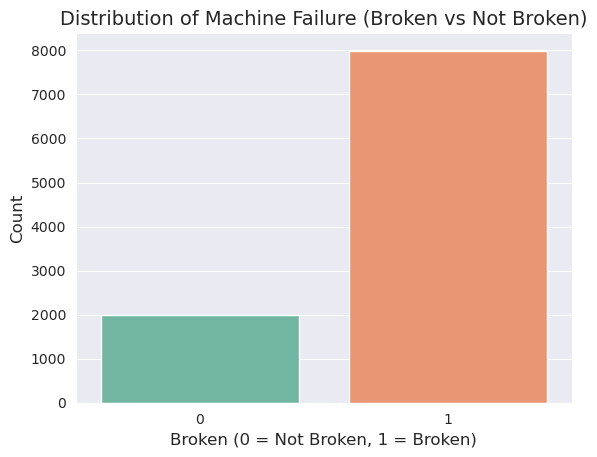

In [32]:
##  Visualization of unbalanced data
sns.countplot(data=df_new, x='Broken', palette='Set2')

plt.title('Distribution of Machine Failure (Broken vs Not Broken)', fontsize=14)
plt.xlabel('Broken (0 = Not Broken, 1 = Broken)', fontsize=12)
plt.ylabel('Count', fontsize=12)


As it is observed, the data is highly skewed and unbalanced, where number of broken values are 4 times bigger that not broken. This will create some issues such as:
1. Biased Predictions: The model may predict "Not Broken" for almost everything to maximize accuracy.
2. Misleading Accuracy:	High accuracy (e.g., 95%) might mean it's just predicting the majority class — while missing nearly all actual failures.


In [33]:
## Handling Imbalanced data and fix it

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_bin)

print("Before SMOTE:", Counter(y_train_bin))
print("After SMOTE:", Counter(y_train_resampled))



Before SMOTE: Counter({1: 6394, 0: 1598})
After SMOTE: Counter({1: 6394, 0: 6394})


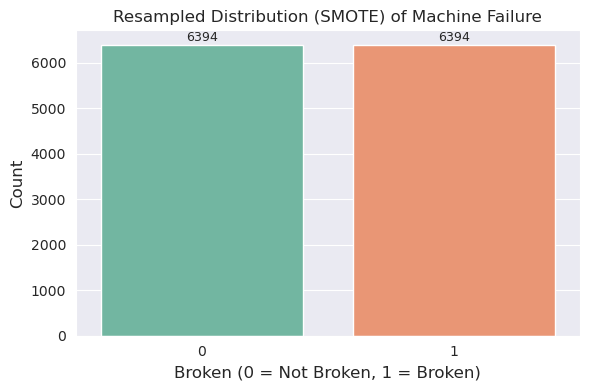

In [34]:
## Visualization

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled, palette='Set2')

# Add labels
plt.title('Resampled Distribution (SMOTE) of Machine Failure', fontsize=12)
plt.xlabel('Broken (0 = Not Broken, 1 = Broken)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show count on top of bars
counts = Counter(y_train_resampled)
for i, count in enumerate([counts[0], counts[1]]):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### <a id='toc3_3_'></a>[Training Classification Models and Evaluation](#toc0_)  

,Model,Accuracy,Precision,Recall,F1 Score
3,SVM (RBF),1.000000,1.000000,1.000000,1.000000
1,KNN,0.998499,1.000000,0.998124,0.999061
0,Logistic Regression,0.809405,0.955157,0.799250,0.870276
2,SVM (Linear),0.801901,0.969555,0.776735,0.862500


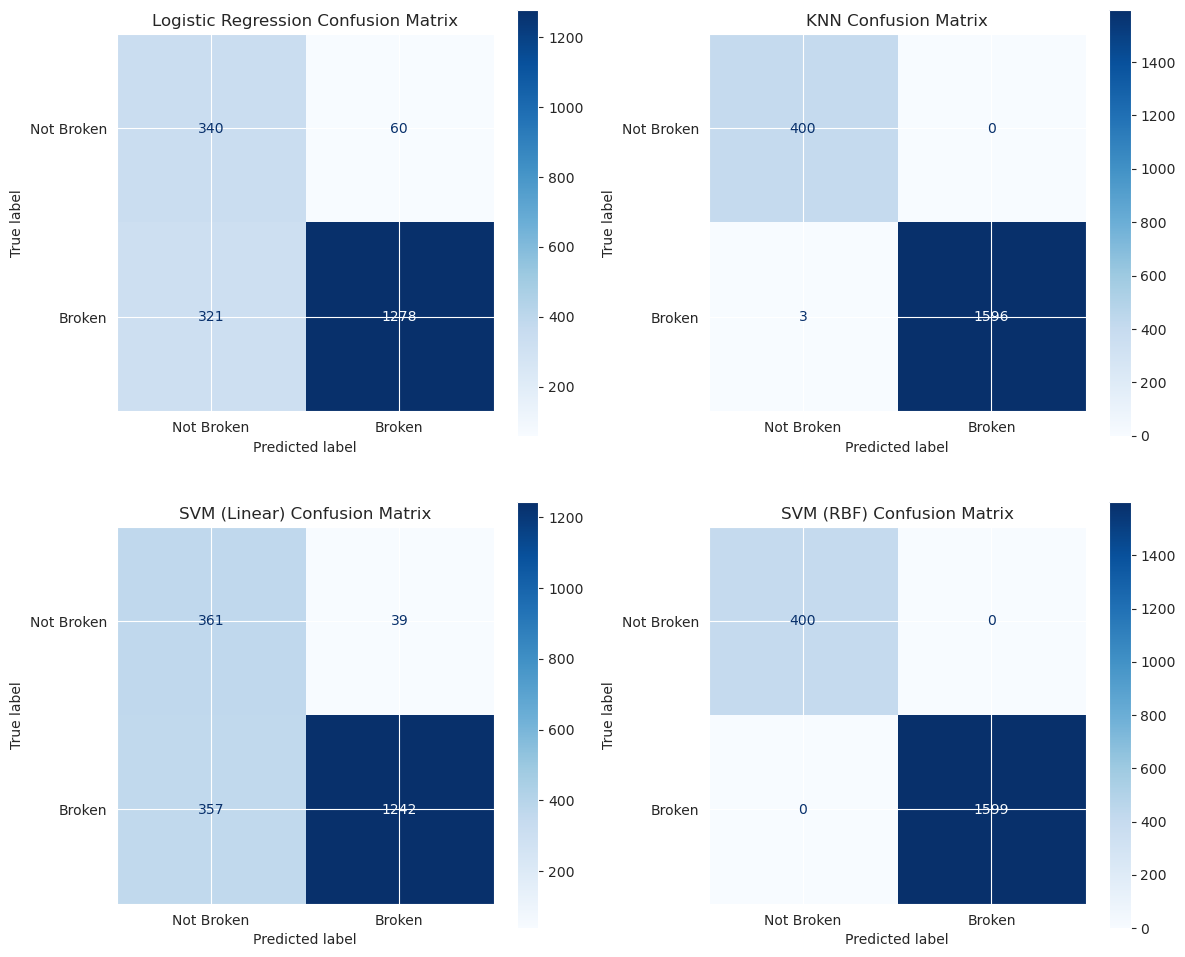

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# Models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=30),
    "SVM (Linear)": SVC(kernel="linear", random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", random_state=42)
}

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test_bin, y_pred)
    prec = precision_score(y_test_bin, y_pred)
    rec = recall_score(y_test_bin, y_pred)
    f1 = f1_score(y_test_bin, y_pred)

    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)

    cm = confusion_matrix(y_test_bin, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Broken", "Broken"])
    disp.plot(ax=axes[idx], values_format='d', cmap="Blues")
    axes[idx].set_title(f"{name} Confusion Matrix")

plt.tight_layout()

results_df = pd.DataFrame(results)
results_df.sort_values(by="F1 Score", ascending=False, inplace=True)

results_df

### <a id='toc3_4_'></a>[Tuning Hyperparameters](#toc0_)  

In [36]:
## Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define parameters
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 10, 15, 30]
    },
    "SVM (Linear)": {
        "C": [0.1, 1, 10],
        "tol": [1e-4, 1e-3]
    },
    "SVM (RBF)": {
        "C": [0.1, 1, 10],
        "gamma": ["scale", 0.01, 0.1]
    }
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel="linear", random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", random_state=42)
}

best_params = {}
tuned_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    best_params[name] = grid_search.best_params_

    acc = accuracy_score(y_test_bin, y_pred)
    prec = precision_score(y_test_bin, y_pred)
    rec = recall_score(y_test_bin, y_pred)
    f1 = f1_score(y_test_bin, y_pred)

    tuned_results["Model"].append(name)
    tuned_results["Accuracy"].append(acc)
    tuned_results["Precision"].append(prec)
    tuned_results["Recall"].append(rec)
    tuned_results["F1 Score"].append(f1)

tuned_results_df = pd.DataFrame(tuned_results).sort_values(by="F1 Score", ascending=False)
tuned_results_df, best_params


(                 Model  Accuracy  Precision    Recall  F1 Score
 1                  KNN  1.000000   1.000000  1.000000  1.000000
 3            SVM (RBF)  1.000000   1.000000  1.000000  1.000000
 0  Logistic Regression  0.802401   0.968847  0.777986  0.862990
 2         SVM (Linear)  0.800900   0.972463  0.772983  0.861324,
 {'Logistic Regression': {'C': 0.01, 'penalty': 'l2'},
  'KNN': {'n_neighbors': 3},
  'SVM (Linear)': {'C': 0.1, 'tol': 0.0001},
  'SVM (RBF)': {'C': 10, 'gamma': 'scale'}})

### <a id='toc3_4_'></a>[Model Comparison](#toc0_)  

In [37]:
tuned_results_df

,Model,Accuracy,Precision,Recall,F1 Score
1,KNN,1.000000,1.000000,1.000000,1.000000
3,SVM (RBF),1.000000,1.000000,1.000000,1.000000
0,Logistic Regression,0.802401,0.968847,0.777986,0.862990
2,SVM (Linear),0.800900,0.972463,0.772983,0.861324


## <a id='toc4_'></a>[Multiple Choice Classification](#toc0_)  

### <a id='toc4_1_'></a>[Training Classification Models and Evaluation](#toc0_)  

In [42]:
# Preprocessing and Split Data 


feature_cols = ['Air Temp (°C)', 'Process Temp (°C)', 'Rotational Speed (RPM)', 'Torque (Nm)', 'Tool Wear (Seconds)']
X = df_new[feature_cols]
y_multi = df_new['Failure Encoded']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

scaler = StandardScaler()
X_train_multi_scaled = scaler.fit_transform(X_train_multi)
X_test_multi_scaled = scaler.transform(X_test_multi)



In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

models_multi = {
    "KNN": KNeighborsClassifier(n_neighbors=50),
    "Decision Tree": DecisionTreeClassifier(random_state=42 , max_depth= 2),
    "Random Forest": RandomForestClassifier(random_state=42 , n_estimators=2, max_depth=2),
    "SVM (OvO)": OneVsOneClassifier(SVC(C=0.01, kernel='linear', random_state=42)),
    "SVM (OvR)": OneVsRestClassifier(SVC(C=0.01, kernel='linear', random_state=42))
}

results_multi = {
    "Model": [],
    "Accuracy": [],
    "Precision (macro)": [],
    "Recall (macro)": [],
    "F1 Score (macro)": []
}

In [72]:
## Evaluation

for idx, (name, model) in enumerate(models_multi.items()):
    model.fit(X_train_multi_scaled, y_train_multi)
    y_pred = model.predict(X_test_multi_scaled)

    acc = accuracy_score(y_test_multi, y_pred)
    prec = precision_score(y_test_multi, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test_multi, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_multi, y_pred, average='macro', zero_division=0)

    results_multi["Model"].append(name)
    results_multi["Accuracy"].append(acc)
    results_multi["Precision (macro)"].append(prec)
    results_multi["Recall (macro)"].append(rec)
    results_multi["F1 Score (macro)"].append(f1)


results_df_multi = pd.DataFrame(results_multi)
results_df_multi.sort_values(by="F1 Score (macro)", ascending=False, inplace=True)
results_df_multi.head()

,Model,Accuracy,Precision (macro),Recall (macro),F1 Score (macro)
0,KNN,0.998999,0.999000,0.9990,0.998999
3,SVM (OvO),0.998499,0.998501,0.9985,0.998499
4,SVM (OvR),0.978489,0.980307,0.9785,0.978396
1,Decision Tree,0.799900,0.700000,0.8000,0.733333
2,Random Forest,0.798899,0.699751,0.7990,0.732610


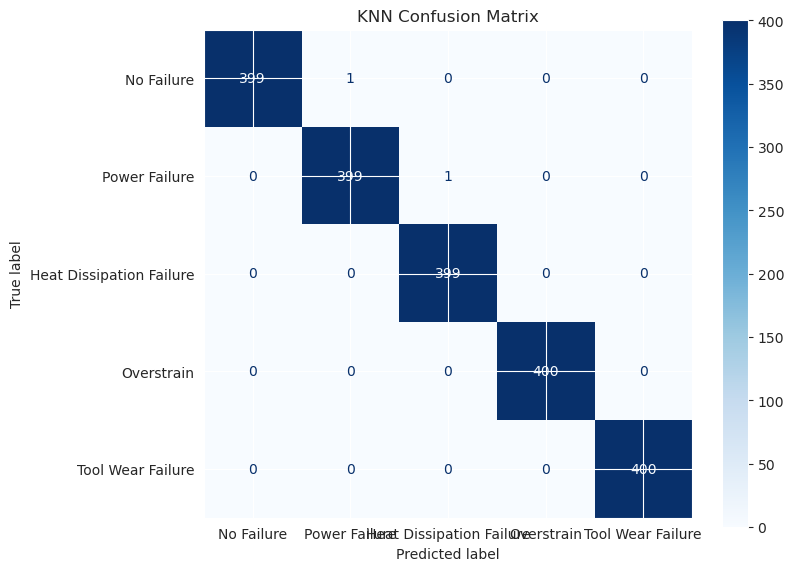

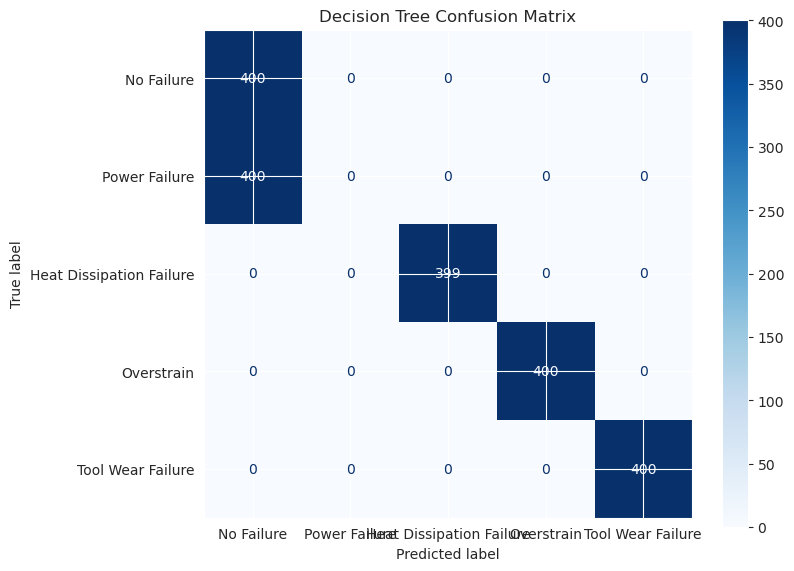

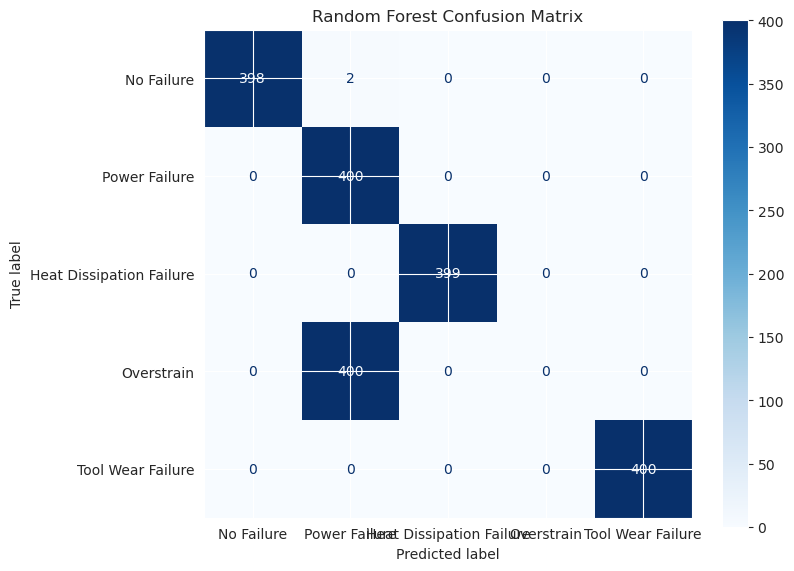

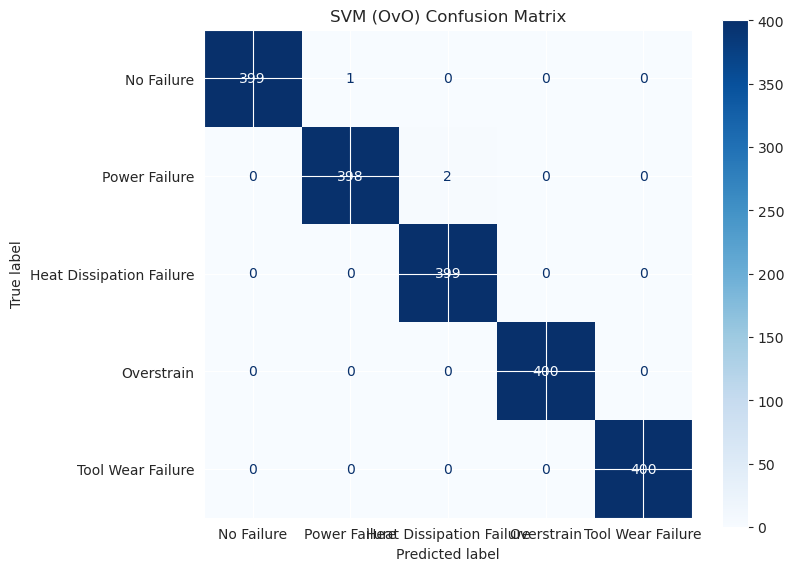

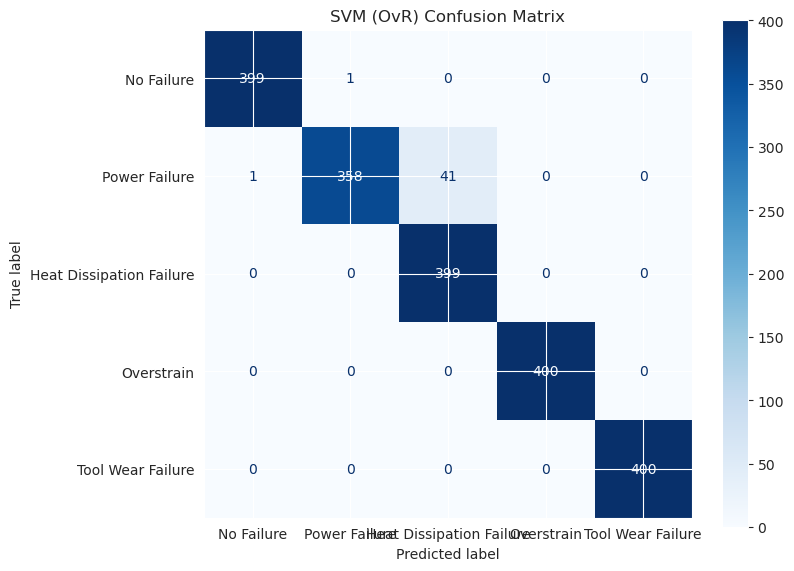

In [73]:
for name, model in models_multi.items():
    model.fit(X_train_multi_scaled, y_train_multi)
    y_pred = model.predict(X_test_multi_scaled)

    acc = accuracy_score(y_test_multi, y_pred)
    prec = precision_score(y_test_multi, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test_multi, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_multi, y_pred, average='macro', zero_division=0)

    results_multi["Model"].append(name)
    results_multi["Accuracy"].append(acc)
    results_multi["Precision (macro)"].append(prec)
    results_multi["Recall (macro)"].append(rec)
    results_multi["F1 Score (macro)"].append(f1)

    cm = confusion_matrix(y_test_multi, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_new['Failure Types'].unique())

    # Create a new figure for each matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap="Blues", values_format='d')
    ax.set_title(f"{name} Confusion Matrix")
    plt.tight_layout()
    plt.show()


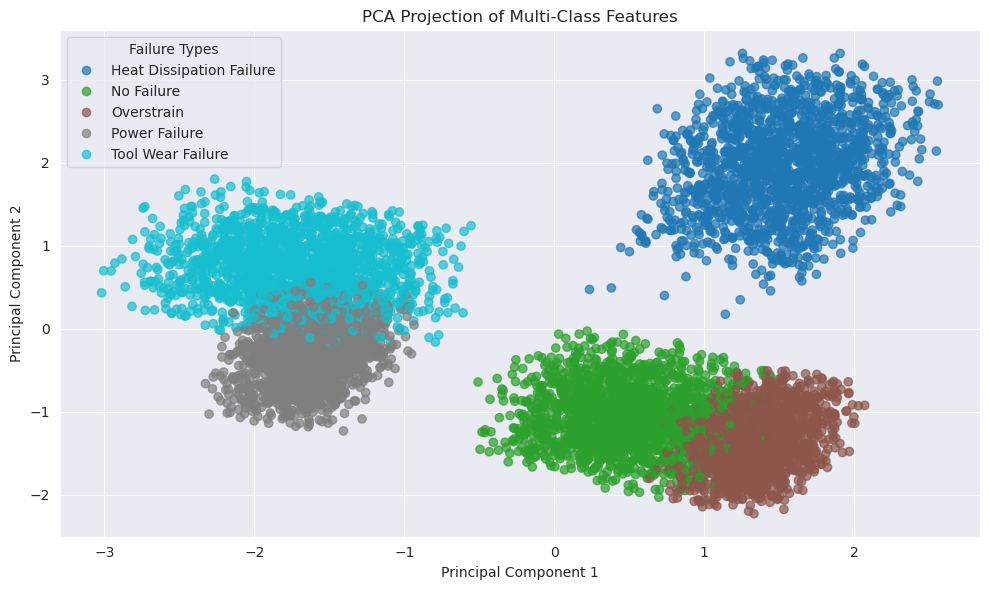

In [74]:
# Reduce dimensionality to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_multi_scaled)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_multi, cmap='tab10', alpha=0.7)

# Add legend using original class labels
handles, _ = scatter.legend_elements(prop="colors")
plt.legend(handles, le.classes_, title="Failure Types")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Multi-Class Features")
plt.grid(True)
plt.tight_layout()

### <a id='toc4_2_'></a>[Tuning Hyperparameters](#toc0_)  

In [75]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# Models and their parameter grids
param_grids = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [5, 10, None]
        }
    },
    "SVM (OvO)": {
        "model": OneVsOneClassifier(SVC(kernel='rbf', random_state=42)),
        "params": {
            "estimator__C": [0.1, 1, 10],
            "estimator__gamma": ['scale', 0.01, 0.1]
        }
    },
    "SVM (OvR)": {
        "model": OneVsRestClassifier(SVC(kernel='rbf', random_state=42)),
        "params": {
            "estimator__C": [0.1, 1, 10],
            "estimator__gamma": ['scale', 0.01, 0.1]
        }
    }
}

best_models = {}
print("🔍 Hyperparameter Tuning & Evaluation:\n")

for name, mp in param_grids.items():
    print(f"🔧 {name}")
    
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_multi_scaled, y_train_multi)
    
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    print("  Best Params:", grid.best_params_)
    
    y_pred = best_model.predict(X_test_multi_scaled)
    report = classification_report(y_test_multi, y_pred, target_names=le.classes_)
    print("  Classification Report:\n", report)
    print("="*60)


🔍 Hyperparameter Tuning & Evaluation:

🔧 KNN
  Best Params: {'n_neighbors': 3}
  Classification Report:
                           precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00       400
              No Failure       1.00      1.00      1.00       400
              Overstrain       1.00      1.00      1.00       399
           Power Failure       1.00      1.00      1.00       400
       Tool Wear Failure       1.00      1.00      1.00       400

                accuracy                           1.00      1999
               macro avg       1.00      1.00      1.00      1999
            weighted avg       1.00      1.00      1.00      1999

🔧 Decision Tree
  Best Params: {'max_depth': 5, 'min_samples_split': 2}
  Classification Report:
                           precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00       400
              No Failure       1.00      1.00      1.00       400
 

### <a id='toc4_3_'></a>[Model Comparison](#toc0_)  